<a href="https://colab.research.google.com/github/Ro-netizen004/GradAdmissionPredictor/blob/main/Admission_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mohansacharya/graduate-admissions")

Skipping, found downloaded files in "./graduate-admissions" (use force=True to force download)


In [5]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Define the file path to the dataset (this path works in Google Colab or Jupyter if the file is in the specified directory)
file_path = "/content/graduate-admissions/Admission_Predict_Ver1.1.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame to get a quick look at the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# Create feature matrix X by dropping the target column "Chance of Admit " from the DataFrame
X = df.drop(["Chance of Admit ", "Serial No."], axis=1)

# Create target vector Y by selecting the "Chance of Admit " column
Y = df["Chance of Admit "]

# Display the features (X) and target (Y) to verify the split
X, Y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 495        332          108                  5  4.5   4.0  9.02         1
 496        337          117                  5  5.0   5.0  9.87         1
 497        330          120                  5  4.5   5.0  9.56         1
 498        312          103                  4  4.0   5.0  8.43         0
 499        327          113                  4  4.5   4.5  9.04         0
 
 [500 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
intercept = model.intercept_
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Intercept:", intercept)

Mean Squared Error: 0.003704655398788405
Mean Absolute Error: 0.042722654277053636
R-squared: 0.8188432567829631
Intercept: -1.4214470719016465


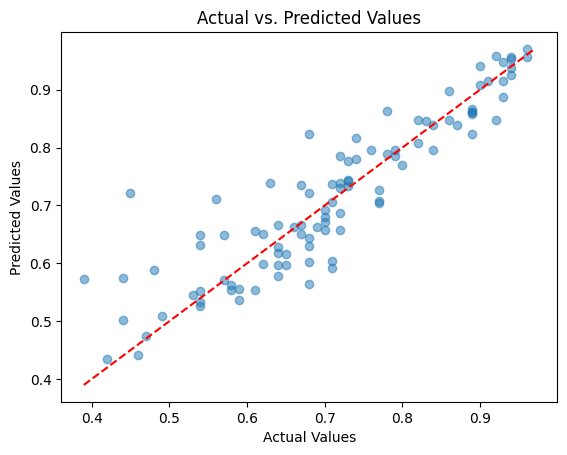

In [15]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred, alpha = 0.5)
min_val = min(min(Y_test), min(y_pred))
max_val = max(max(Y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

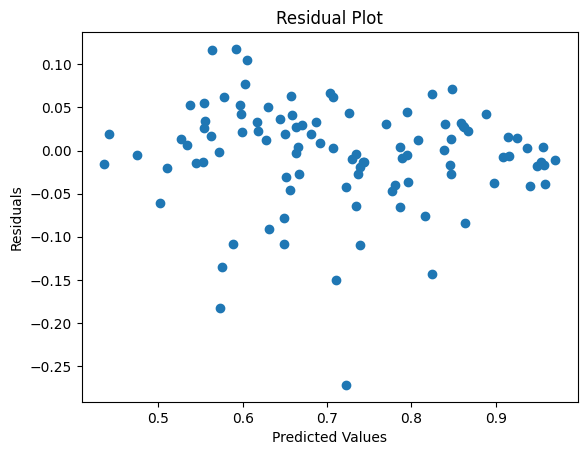

In [16]:
# Plot residuals
# Residuals are plotted against the predicted values of the target variable.
# Residual plot should show a random scatter of points around zero
plt.scatter(y_pred, Y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [19]:
import joblib
joblib.dump(model, "graduate_admission_model.joblib")

['graduate_admission_model.joblib']

### Dataset Citation

This notebook uses the Graduate Admissions Dataset available at [Kaggle](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions).

**Citation**:  
Mohan S Acharya, Asfia Armaan, Aneeta S Antony.  
*A Comparison of Regression Models for Prediction of Graduate Admissions*.  
IEEE International Conference on Computational Intelligence in Data Science, 2019.
